## Standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [2]:
full_data = pd.read_excel("C:/Users/bodin/School/STAT 5001/project/gl_project_dataset.xlsx")

In [3]:
# Reduce data to include only games from the year 2000+
data_reduced = full_data[full_data['date'] > 20000101]     #yyyymmdd

# Only include variables specified in write-up
data = data_reduced[['away_AB', 'away_H', 'away_2B', 'away_3B',
             'away_HR', 'away_SH', 'away_SF', 'away_HBP', 
             'away_BB', 'away_IBB', 'away_K', 'away_SB', 'away_CS', 
             'away_GIDP', 'away_CI', 'away_score', 
             'home_AB', 'home_H', 'home_2B', 'home_3B', 
             'home_HR', 'home_SH', 'home_SF', 'home_HBP', 
             'home_BB', 'home_IBB', 'home_K', 'home_SB', 'home_CS', 
             'home_GIDP', 'home_CI', 'home_score']]

In [4]:
# Ensure no 'na' values
data = data.dropna()

# Add singles column as specified in our write-up
data['away_1B'] = data['away_H'] - data['away_2B'] - data['away_3B'] - data['away_HR']
data['home_1B'] = data['home_H'] - data['home_2B'] - data['home_3B'] - data['home_HR']

In [5]:
# Combine away and home data columns to split into training & test sets
data2 = pd.DataFrame()

data2['AB'] = pd.concat([data['away_AB'], data['home_AB']], ignore_index=True)
data2['H'] = pd.concat([data['away_H'], data['home_H']], ignore_index=True)
data2['1B'] = pd.concat([data['away_1B'], data['home_1B']], ignore_index=True)
data2['2B'] = pd.concat([data['away_2B'], data['home_2B']], ignore_index=True)
data2['3B'] = pd.concat([data['away_3B'], data['home_3B']], ignore_index=True)
data2['HR'] = pd.concat([data['away_HR'], data['home_HR']], ignore_index=True)
data2['SH'] = pd.concat([data['away_SH'], data['home_SH']], ignore_index=True)
data2['SF'] = pd.concat([data['away_SF'], data['home_SF']], ignore_index=True)
data2['HBP'] = pd.concat([data['away_HBP'], data['home_HBP']], ignore_index=True)
data2['BB'] = pd.concat([data['away_BB'], data['home_BB']], ignore_index=True)
data2['IBB'] = pd.concat([data['away_IBB'], data['home_IBB']], ignore_index=True)
data2['K'] = pd.concat([data['away_K'], data['home_K']], ignore_index=True)
data2['SB'] = pd.concat([data['away_SB'], data['home_SB']], ignore_index=True)
data2['CS'] = pd.concat([data['away_CS'], data['home_CS']], ignore_index=True)
data2['GIDP'] = pd.concat([data['away_GIDP'], data['home_GIDP']], ignore_index=True)
data2['CI'] = pd.concat([data['away_CI'], data['home_CI']], ignore_index=True)
data2['SCORE'] = pd.concat([data['away_score'], data['home_score']], ignore_index=True)

In [6]:
data2.shape, data.shape

((110350, 17), (55175, 34))

In [7]:
data2.columns.tolist()

['AB',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'SH',
 'SF',
 'HBP',
 'BB',
 'IBB',
 'K',
 'SB',
 'CS',
 'GIDP',
 'CI',
 'SCORE']

In [8]:
X = data2.drop('SCORE', axis=1)
y = data2['SCORE']

## Run Principal Components

In [9]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [10]:
# Split data
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Standardize data
X_train_std = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_std = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [52]:
# Principal component analysis
#n_components = min(X_train_std.shape[0], X_train_std.shape[1])
n_components = 8 
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [53]:
X_train_pca.shape, X_train_std.shape

((88280, 8), (88280, 16))

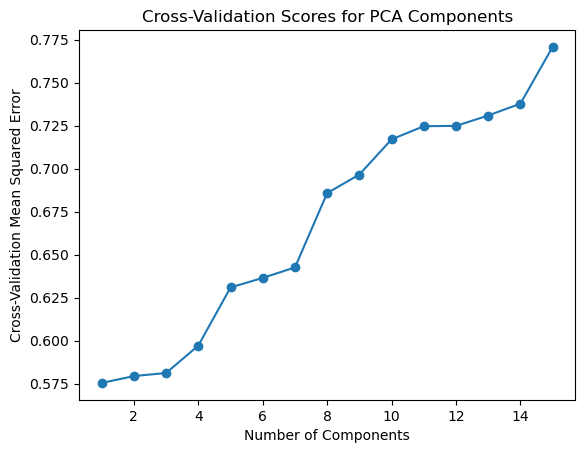

Best Number of Components: 1


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

components_range = np.arange(1, 16)
cv_scores = []

for n_components in components_range:
    pca = PCA(n_components = n_components)
    X_train_pca = pca.fit_transform(X_train_std)
    
    model = LinearRegression()
    
    scores = cross_val_score(model, X_train_pca, y_train, cv=5)
    cv_scores.append(np.mean(scores))


# Plot the cross-validation scores
plt.plot(components_range, cv_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Mean Squared Error')
plt.title('Cross-Validation Scores for PCA Components')
plt.show()

# Choose the number of components with the lowest cross-validation error
best_n_components = components_range[np.argmin(cv_scores)]
print(f'Best Number of Components: {best_n_components}')

## Principal components regression

### 1 Component

In [93]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can inspect the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

Mean Squared Error: 4.232229239345806
Explained Variance Ratio: [0.18945211]


In [94]:
model.score(X_test_pca, y_test)

0.583548219102603

### 2 Components

In [95]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can inspect the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

model.score(X_test_pca, y_test)

Mean Squared Error: 4.185261282993794
Explained Variance Ratio: [0.1894519  0.08664394]


0.588169870710239

### 8 Components

In [96]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can inspect the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

model.score(X_test_pca, y_test)

Mean Squared Error: 3.1258765324126028
Explained Variance Ratio: [0.18945211 0.08690096 0.08104141 0.06757941 0.06501706 0.0639633
 0.06230393 0.0616919 ]


0.6924134362367786

### 15 Components

In [97]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can inspect the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

model.score(X_test_pca, y_test)

Mean Squared Error: 2.2750524555124167
Explained Variance Ratio: [0.18945211 0.08690096 0.08104141 0.06757941 0.06501706 0.0639633
 0.06230393 0.0616919  0.06006351 0.05784864 0.05678729 0.05129051
 0.0430651  0.03778218 0.01521271]


0.7761346105912748

## Find best model

In [14]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [16]:
# Create a PCA regression model with a linear regression estimator
pca_model = Pipeline([
    ('pca', PCA()),
    ('regression', LinearRegression())
])

# Set up parameter grid for grid search
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                         10, 11, 12, 13, 14, 15, 16
                         ],  # Example values for the number of components
}

In [18]:
# Create GridSearchCV object
grid_search = GridSearchCV(pca_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('regression', LinearRegression())]),
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16]},
             scoring='neg_mean_squared_error')

In [23]:
# Access the linear regression estimator from the best model
best_regressor = grid_search.best_estimator_.named_steps['regression']

In [20]:
# Get the best parameters and best cross-validated score
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test_std)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'pca__n_components': 15}
Mean Squared Error on Test Set: 2.2750524555124167


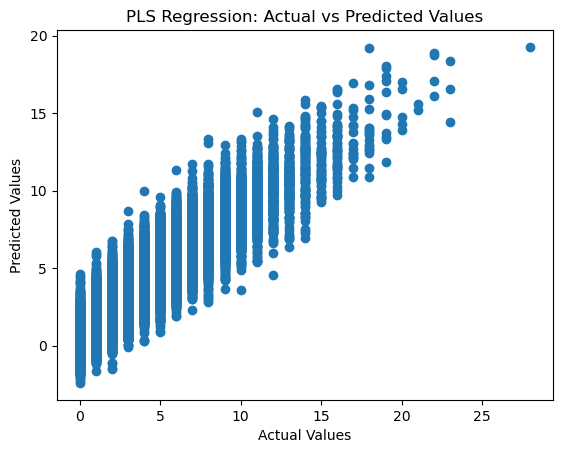

In [21]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('PLS Regression: Actual vs Predicted Values')
plt.show()

In [24]:
# Display the coefficients
coefficients = best_regressor.coef_
intercept = best_regressor.intercept_

print("Linear Regression Coefficients:")
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Linear Regression Coefficients:
Intercept: 4.55642274580879
Coefficients: [ 1.3741524  -0.17604682  0.11258342  0.38051764 -0.56835614  0.23240342
  0.2462425  -0.65954217  0.33430727 -0.46814712  0.28983752 -0.04653517
 -0.29509363 -0.33634182 -1.16025251]
